<a href="https://colab.research.google.com/github/samobrien878/DS2002F24/blob/main/sql_lite_hw_completed_sam_obrien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
connection = sqlite3.connect('student_grades.db',timeout=20)
cursor = connection.cursor()


In [ ]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS students(
    student_id INTEGER PRIMARY KEY AUTOINCREMENT,
    first_name TEXT NOT NULL,
    last_name TEXT NOT NULL
)
''')

In [ ]:
cursor.execute('''
CREATE TABLE IF NOT EXISTS grades(
    grades_id INTEGER,
    student_id INTEGER,
    subject TEXT NOT NULL,
    grade INTEGER
)
''')


In [ ]:
    student_data = [
    (1,'Alice','Johnson'),
     (2,'Bob','Smith'),
     (3,'Carol','White'),
     (4,'David','Brown'),
     (5,'Eve','Davis')
]


cursor.executemany('''
INSERT INTO students (student_id, first_name, last_name) VALUES (?, ?, ?)
''', student_data)

connection.commit()

IntegrityError: UNIQUE constraint failed: students.student_id

In [ ]:
grades_data = [
    (1,1,'Math',95),
    (2,1,'English',88),
    (3,1,'History',90),
    (4,2,'Math',82),
    (5,2,'English','76'),
    (6,2,'History',85),
    (7,3,'Math',92),
    (8,3,'English',95),
    (9,3,'History',91),
    (10,4,'Math',88),
    (11,4,'English',92),
    (12,4,'History',89),
    (13,5,'Math',94),
    (14,5,'English',91),
    (15,5,'History',93)
]


cursor.executemany('''
INSERT INTO grades (grades_id, student_id, subject, grade) VALUES (?, ?, ?,?)
''', grades_data)


connection.commit()

In [ ]:
cursor.execute('''
SELECT Students.first_name, Students.Last_name, Grades.subject, Grades.grade FROM Students
JOIN Grades ON Students.student_id = Grades.student_id
''')

for row in cursor.fetchall():
  print(row)

('Alice', 'Johnson', 'Math', 95)
('Alice', 'Johnson', 'English', 88)
('Alice', 'Johnson', 'History', 90)
('Bob', 'Smith', 'Math', 82)
('Bob', 'Smith', 'English', 76)
('Bob', 'Smith', 'History', 85)
('Carol', 'White', 'Math', 92)
('Carol', 'White', 'English', 95)
('Carol', 'White', 'History', 91)
('David', 'Brown', 'Math', 88)
('David', 'Brown', 'English', 92)
('David', 'Brown', 'History', 89)
('Eve', 'Davis', 'Math', 94)
('Eve', 'Davis', 'English', 91)
('Eve', 'Davis', 'History', 93)


In [ ]:
cursor.execute('''
SELECT Students.first_name, Students.Last_name, AVG(Grades.grade) AS average_grade FROM Students
JOIN Grades ON Students.student_id = Grades.student_id
GROUP BY Students.student_id ORDER BY average_grade DESC LIMIT 1
''')

for row in cursor.fetchall():
  print(row)

('Alice', 'Johnson', 91.0)
('Bob', 'Smith', 81.0)
('Carol', 'White', 92.66666666666667)
('David', 'Brown', 89.66666666666667)
('Eve', 'Davis', 92.66666666666667)


In [ ]:
cursor.execute('''
SELECT Students.first_name, Students.Last_name, AVG(Grades.grade) AS average_grade FROM Students
JOIN Grades ON Students.student_id = Grades.student_id
GROUP BY Students.student_id ORDER BY average_grade DESC LIMIT 1
''')

for row in cursor.fetchall():
  print(row)

('Eve', 'Davis', 92.66666666666667)


In [ ]:
cursor.execute('''
SELECT SUM(grade)/ COUNT(grade) AS average_math_grade FROM Grades
WHERE subject = 'Math'
''')

for row in cursor.fetchall():
  average_math_grade = row[0]
  print(f'The Average Math Grade is:',average_math_grade)

The Average Math Grade is: 90


In [ ]:
cursor.execute('''
SELECT Students.first_name, Students.Last_name, Grades.grade FROM Students
JOIN Grades ON Students.student_id = Grades.student_id
WHERE Grades.grade >= 90
''')

for row in cursor.fetchall():
  print(row)

('Alice', 'Johnson', 95)
('Alice', 'Johnson', 90)
('Carol', 'White', 92)
('Carol', 'White', 95)
('Carol', 'White', 91)
('David', 'Brown', 92)
('Eve', 'Davis', 94)
('Eve', 'Davis', 91)
('Eve', 'Davis', 93)


In [ ]:
import pandas as pd
students_df = pd.read_sql_query('SELECT * FROM students', connection)
students_df

,student_id,first_name,last_name
0,1,Alice,Johnson
1,2,Bob,Smith
2,3,Carol,White
3,4,David,Brown
4,5,Eve,Davis


In [ ]:
grades_df = pd.read_sql_query('SELECT * FROM grades', connection)
grades_df

,grades_id,student_id,subject,grade
0,1,1,Math,95
1,2,1,English,88
2,3,1,History,90
3,4,2,Math,82
4,5,2,English,76
5,6,2,History,85
6,7,3,Math,92
7,8,3,English,95
8,9,3,History,91
9,10,4,Math,88


In [ ]:
joined_df = pd.merge(students_df, grades_df, on='student_id')
joined_df

,student_id,first_name,last_name,grades_id,subject,grade
0,1,Alice,Johnson,1,Math,95
1,1,Alice,Johnson,2,English,88
2,1,Alice,Johnson,3,History,90
3,2,Bob,Smith,4,Math,82
4,2,Bob,Smith,5,English,76
5,2,Bob,Smith,6,History,85
6,3,Carol,White,7,Math,92
7,3,Carol,White,8,English,95
8,3,Carol,White,9,History,91
9,4,David,Brown,10,Math,88


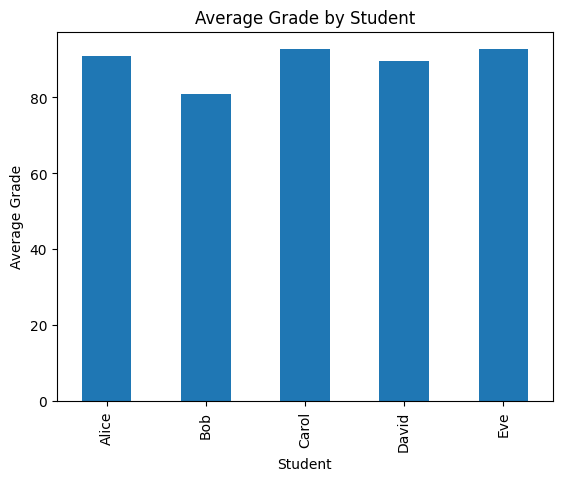

In [ ]:
import matplotlib.pyplot as plt

average_grade_by_student = joined_df.groupby('first_name')['grade'].mean()
average_grade_by_student.plot(kind='bar')
plt.xlabel('Student')
plt.ylabel('Average Grade')
plt.title('Average Grade by Student')
plt.show()

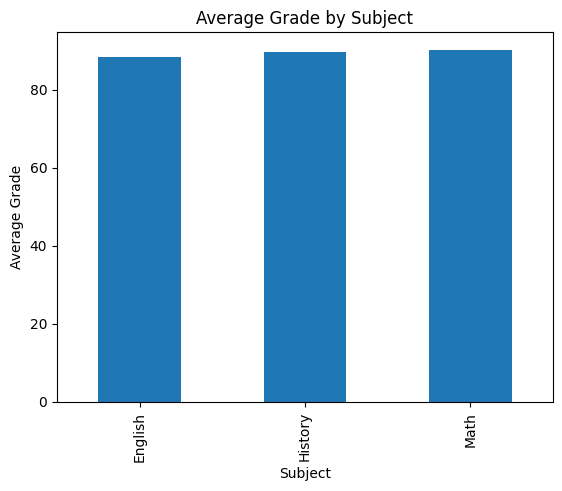

In [ ]:
average_grade_by_subject = joined_df.groupby('subject')['grade'].mean()
average_grade_by_subject.plot(kind='bar')
plt.xlabel('Subject')
plt.ylabel('Average Grade')
plt.title('Average Grade by Subject')
plt.show()

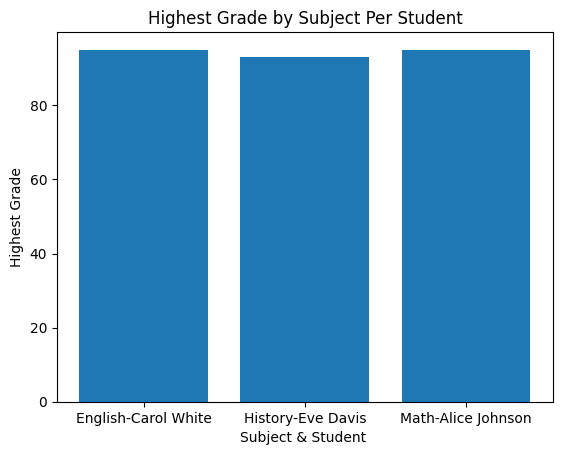

In [ ]:
highest_grade_subject = pd.read_sql_query('''
SELECT subject, first_name, last_name, MAX(grade) AS high_grade
FROM students
JOIN grades ON students.student_id = grades.student_id
GROUP BY subject
''', connection)
highest_grade_subject


plt.bar(highest_grade_subject['subject']+ '-' +highest_grade_subject['first_name'] + ' ' +highest_grade_subject['last_name'],
        highest_grade_subject['high_grade'])
plt.xlabel('Subject & Student ')
plt.ylabel('Highest Grade')
plt.title('Highest Grade by Subject Per Student')
plt.show()